# Projet final 
--------
----
### Dataset : "Smartphone-Based Recognition of Human Activities and Postural Transitions"
#### - Henri Duhamel ESILV A5 -
----

### 1. Imports

In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sn

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn                 import svm
from sklearn.tree            import DecisionTreeClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics         import classification_report, confusion_matrix
from sklearn.ensemble        import RandomForestClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore") #used to remove future warnings

### 2. Formatage et importation des données

In [3]:
data_train = pd.read_csv('Train/X_train.txt', sep=" ", header=None)
data_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


In [4]:
f = open('Train/y_train.txt', 'r')
x_train = f.readlines()  #x_train = y_train.txt file
f.close()

In [5]:
classification=list(map(lambda x:x.strip(),x_train)) # Remove '\n' at the end of each element of the list
data_train['Class'] = classification #new column (class) added to the dataframe: data
data_train.head(3) #On peut voir ci dessous qu'on a bien la class (position) ajoutée au df

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,Class
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,5
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,5
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,5


In [6]:
#Meme manip pour le dossier Test
data_test= pd.read_csv('Test/X_test.txt', sep=" ", header=None)
f = open('Test/y_test.txt', 'r')
x_test = f.readlines()  #x = y_train.txt file
f.close()
classification_test=list(map(lambda x:x.strip(),x_test)) # Remove '\n' at the end of each element of the list
data_test['Class'] = classification_test #new column (class) added to the dataframe: data_test

In [7]:
x_train = data_train.drop('Class', axis=1)
y_train = data_train['Class']
x_test  = data_test.drop('Class', axis=1)
y_test  = data_test['Class']

### 3. Classification des données avec DecisionTreeClassifier

In [8]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [9]:
y_pred = classifier.predict(x_test)

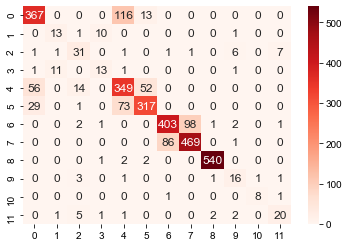

              precision    recall  f1-score   support

           1       0.81      0.74      0.77       496
          10       0.50      0.52      0.51        25
          11       0.54      0.63      0.58        49
          12       0.50      0.48      0.49        27
           2       0.64      0.74      0.69       471
           3       0.83      0.75      0.79       420
           4       0.82      0.79      0.81       508
           5       0.83      0.84      0.83       556
           6       0.99      0.99      0.99       545
           7       0.55      0.70      0.62        23
           8       0.89      0.80      0.84        10
           9       0.67      0.62      0.65        32

    accuracy                           0.81      3162
   macro avg       0.71      0.72      0.71      3162
weighted avg       0.81      0.81      0.81      3162



In [10]:
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"size": 12}, cmap = plt.cm.Reds, fmt='g') 
sn.set(font_scale = 1.2) 
plt.show()
print(classification_report(y_test, y_pred))

In [11]:
dtc_score = classifier.score(x_test,y_test)
print(dtc_score)

0.8051865907653384


### 4. Classification avec RandomForest

In [12]:
RFC = RandomForestClassifier()
RFC_classification = RFC.fit(x_train,y_train)
RFC_pred = RFC_classification.predict(x_test)

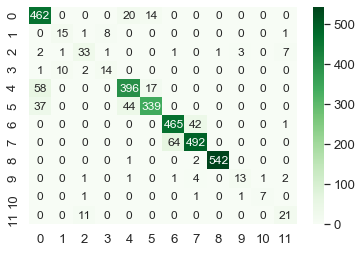

              precision    recall  f1-score   support

           1       0.82      0.93      0.87       496
          10       0.58      0.60      0.59        25
          11       0.67      0.67      0.67        49
          12       0.61      0.52      0.56        27
           2       0.86      0.84      0.85       471
           3       0.92      0.81      0.86       420
           4       0.88      0.92      0.90       508
           5       0.91      0.88      0.90       556
           6       1.00      0.99      1.00       545
           7       0.76      0.57      0.65        23
           8       0.88      0.70      0.78        10
           9       0.66      0.66      0.66        32

    accuracy                           0.89      3162
   macro avg       0.79      0.76      0.77      3162
weighted avg       0.89      0.89      0.88      3162



In [13]:
sn.heatmap(confusion_matrix(y_test, RFC_pred), annot=True, annot_kws={"size": 12}, cmap = plt.cm.Greens, fmt='g') 
sn.set(font_scale = 1.2) 
plt.show()
print(classification_report(y_test,RFC_pred))

In [14]:
RFC_score = RFC_classification.score(x_test,y_test)
print(RFC_score)

0.8851992409867173


### 5. Classification avec LinearSVM

In [15]:
lsvm = svm.SVC(kernel='linear')
lsvm_clf = lsvm.fit(x_train,y_train)
lsvm_pred = lsvm_clf.predict(x_test)

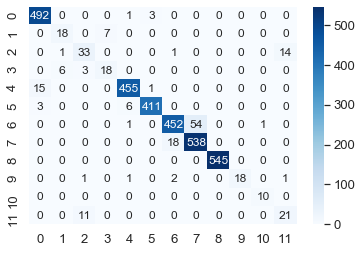

              precision    recall  f1-score   support

           1       0.96      0.99      0.98       496
          10       0.72      0.72      0.72        25
          11       0.69      0.67      0.68        49
          12       0.72      0.67      0.69        27
           2       0.98      0.97      0.97       471
           3       0.99      0.98      0.98       420
           4       0.96      0.89      0.92       508
           5       0.91      0.97      0.94       556
           6       1.00      1.00      1.00       545
           7       1.00      0.78      0.88        23
           8       0.91      1.00      0.95        10
           9       0.58      0.66      0.62        32

    accuracy                           0.95      3162
   macro avg       0.87      0.86      0.86      3162
weighted avg       0.95      0.95      0.95      3162



In [16]:
sn.heatmap(confusion_matrix(y_test, lsvm_pred), annot=True, annot_kws={"size": 12}, cmap = plt.cm.Blues, fmt='g') 
sn.set(font_scale = 1.2) 
plt.show()
print(classification_report(y_test,lsvm_pred))

In [17]:
linearSVM_score = lsvm_clf.score(x_test, y_test)
print(linearSVM_score)

0.9522454142947502


### 6. Comparatifs résultats

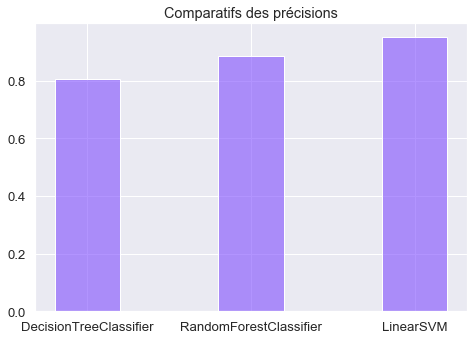

In [18]:
scores = [dtc_score, RFC_score, linearSVM_score]
names  = ["DecisionTreeClassifier","RandomForestClassifier","LinearSVM"]
fig    = plt.figure()
axis   = fig.add_axes([0,0,1,1])


axis.set_title("Comparatifs des précisions")
axis.bar(names, scores, color = (0.5,0.3,1,0.6), width=0.4)
plt.show()

----
### 7. Data preprocessing

**Ci-dessous, on va "nettoyer" le dataset pour ne conserver qu'une partie des colonnes, celles avec les variances les plus élevées.**

Bien que le code ci dessous puisse paraître un peu barbare, il n'est pas si compliqué :


L'objectif de la boucle "for" est de tester chaque modèle (DTC, RFC, SVM) selon un dataframe (train) de plus en plus petit, en effet nous allons calculer la variance de chaque colonne du dataframe et supprimer celles dont la variance est proche de zéro. Nous pourrons donc déterminer par la suite, le nombre de colonnes que l'on peut conserver pour que chaque modèle puisse être effectif, malgré un dataframe plus léger.

*Ce processus pourrait être très utile d'un point de vue algorythmique pour réduire les coûts au niveau du temps de compilation ainsi que de stockage (plus le dataframe est petit, plus il est léger et donc moins de cout de stockage au niveau des bdd ou serveurs).*

----

**LOADING DATA ...**

----

In [19]:
array_scores_DTC = []
array_scores_RFC = []
array_scores_SVM = []
nb_columns       = []

seuil_variance = 0.00
for i in range(0, 7, 1):
    
    variance_list = data_train.var() < seuil_variance
    
    low_var = []
    for i in range(len(variance_list)):
        if variance_list[i] == True:
            low_var.append(i)
            
    data_train_bis = data_train
    data_test_bis  = data_test

    data_train_bis = data_train_bis.drop(columns=low_var)
    data_test_bis  = data_test_bis.drop(columns=low_var)
    
    x_train_bis = data_train_bis.drop('Class', axis=1)
    y_train_bis = data_train_bis['Class']
    x_test_bis  = data_test_bis.drop('Class', axis=1)
    y_test_bis  = data_test_bis['Class']
    
    #ci dessous, calcul du DTC avec le "nouveau" dataframe
    classifier_bis = DecisionTreeClassifier()
    classifier_bis.fit(x_train_bis, y_train_bis)
    y_pred_bis = classifier_bis.predict(x_test_bis)
    dtc_score_bis = classifier_bis.score(x_test_bis,y_test_bis)
    
    #ci dessous, calcul du RFC avec le "nouveau" dataframe
    RFC_bis = RandomForestClassifier()
    RFC_classification_bis = RFC_bis.fit(x_train_bis,y_train_bis)
    RFC_pred_bis = RFC_classification_bis.predict(x_test_bis)
    RFC_score_bis = RFC_classification_bis.score(x_test_bis,y_test_bis)
    
    #ci dessous, calcul du SVM avec le "nouveau" dataframe
    lsvm_bis = svm.SVC(kernel='linear')
    lsvm_clf_bis = lsvm_bis.fit(x_train_bis,y_train_bis)
    lsvm_pred_bis = lsvm_clf_bis.predict(x_test_bis)
    linearSVM_score_bis = lsvm_clf_bis.score(x_test_bis, y_test_bis)
    
    nb_columns.append(len(data_test_bis.columns))
    array_scores_DTC.append(dtc_score_bis)
    array_scores_RFC.append(RFC_score_bis)
    array_scores_SVM.append(linearSVM_score_bis)
    
    seuil_variance = seuil_variance + 0.05

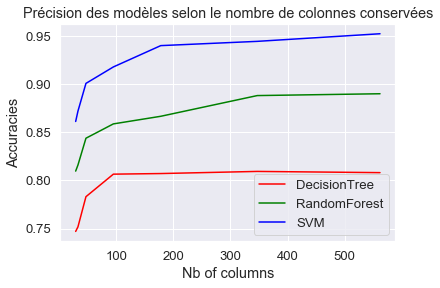

In [20]:
plt.plot(nb_columns, array_scores_DTC, label="DecisionTree", color="red")
plt.plot(nb_columns, array_scores_RFC, label="RandomForest", color="green")
plt.plot(nb_columns, array_scores_SVM, label="SVM", color="blue")
plt.legend()
plt.xlabel("Nb of columns")
plt.ylabel("Accuracies")
plt.title("Précision des modèles selon le nombre de colonnes conservées")
plt.show()

#### SVM :
On aperçoit via le graphique ci dessus que le modèle SVM est très précis dès 175 colonnes et qu'il ne gagne que très peu de précision entre 175 et 560 colonnes

#### RandomForest :
On aperçoit que le modèle RFC ne gagne que peu de précision et de manière très linéaire de 100 colonnes à 560. On pourrait donc décider de conserver uniquement les 100 colonnes avec les variances les plus élevées si on ne tient pas à ces 3% de précision qu'il gagne avec 560 colonnes

#### DecisionTree :
Le modèle DTC connait une précision vers 100 colonnes, qu'il n'améliore réellement qu'à 350 colonnes et plus.